RNN은 순서가 있는 데이터셋에 활용가능합니다.
주가 데이터로 연습해봅시다

https://www.tensorflow.org/guide/keras/rnn

pandas-datareader 패키지를 통해 다양한 금융/경제 데이터를 얻을 수 있습니다

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-naver


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import pandas_datareader.data as web  # 금융/경제 데이터 다운로드

df = web.DataReader('005930', 'naver', start='2010-01-01', end='2020-12-31')

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,16060,16180,16000,16180,239271
2010-01-05,16520,16580,16300,16440,559219
2010-01-06,16580,16820,16520,16820,459755
2010-01-07,16820,16820,16260,16260,443237
2010-01-08,16400,16420,16120,16420,295798
...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326
2020-12-24,74100,78800,74000,77800,32502870
2020-12-28,79000,80100,78200,78700,40085044


In [ ]:
df.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

In [ ]:
import pandas as pd
df=df.apply(pd.to_numeric)

In [ ]:
df.dtypes

Open      int64
High      int64
Low       int64
Close     int64
Volume    int64
dtype: object

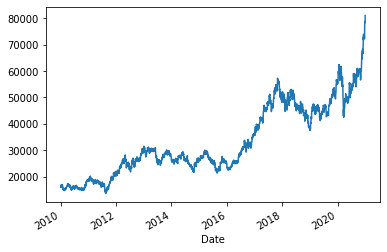

In [ ]:
df.Close.plot()  # df['Close']과 df.Close는 동일

In [ ]:
TEST_SIZE = 300

train = df.Close[:-TEST_SIZE]
test = df.Close[-TEST_SIZE:]

In [ ]:
import numpy as np
window_size = 20

inputs = []
targets = []
for i in range(len(train) - window_size):
    inputs.append(np.array(train[i:i+window_size]))
    targets.append(np.array(train[i+window_size]))


In [ ]:
inputs[0]

array([16180, 16440, 16820, 16260, 16420, 15940, 16180, 15940, 16540,
       16840, 16860, 16460, 16680, 17000, 16500, 16840, 16300, 16000,
       16160, 15680])

In [ ]:
targets[0]

array(15540)

In [ ]:
inputs = np.array(inputs)
targets = np.array(targets)

In [ ]:
print(inputs.shape)
print(targets.shape)

(2394, 20)
(2394,)


In [ ]:
window_size = 20

test_inputs = []
test_targets = []
for i in range(len(test) - window_size):
    test_inputs.append(np.array(test[i:i+window_size]))
    test_targets.append(np.array(test[i+window_size]))
test_inputs=np.array(test_inputs)
test_targets = np.array(test_targets)

In [ ]:
test_inputs = np.expand_dims(test_inputs,2)

In [ ]:
test_inputs.shape

(280, 20, 1)

In [ ]:
inputs = np.expand_dims(inputs,2)
targets = np.expand_dims(targets,1)
test_targets = np.expand_dims(test_targets,1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.SimpleRNN(20, 
               input_shape=(20,1), 
               activation='relu', 
               return_sequences=False)
          )

model.add(layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20)                440       
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(inputs, targets, 
                                    epochs=50, 
                                    batch_size=16,
                                    validation_data=(test_inputs, test_targets))

Epoch 1/50
150/150 [==============================] - 2s 6ms/step - loss: 115993748.2649 - val_loss: 1835057.1250
Epoch 2/50
150/150 [==============================] - 1s 4ms/step - loss: 404754.1012 - val_loss: 1797889.7500
Epoch 3/50
150/150 [==============================] - 1s 4ms/step - loss: 369106.1546 - val_loss: 1828526.3750
Epoch 4/50
150/150 [==============================] - 1s 4ms/step - loss: 421814.3924 - val_loss: 1725032.0000
Epoch 5/50
150/150 [==============================] - 1s 4ms/step - loss: 359347.9357 - val_loss: 1714648.7500
Epoch 6/50
150/150 [==============================] - 1s 4ms/step - loss: 365308.8678 - val_loss: 1721745.7500
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 375576.6647 - val_loss: 1677258.1250
Epoch 8/50
150/150 [==============================] - 1s 4ms/step - loss: 365821.3593 - val_loss: 1620074.0000
Epoch 9/50
150/150 [==============================] - 1s 4ms/step - loss: 348627.8684 - val_loss: 1616747.375

In [ ]:
pred = model.predict(test_inputs)

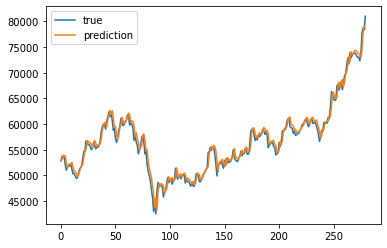

In [ ]:
import matplotlib.pyplot as plt

plt.plot(test_targets, label = 'true')
plt.plot(pred, label = 'prediction')
plt.legend()

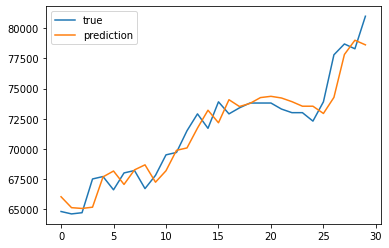

In [ ]:
plt.plot(test_targets[-30:], label = 'true')
plt.plot(pred[-30:], label = 'prediction')
plt.legend()

단순히 Lagging되는 효과이며, 예측이라고 하기 어렵다. 
따라서 사용에 주의가 필요함